# Implementing Random Forest Classifier

* The random forest is an ensemble learning method, composed of multiple decision trees. By averaging out the impact of several decision trees, random forests tend to improve prediction.
* Random forests tend to shine in scenarios where a model has a large number of features that individually have weak predicative power but much stronger power collectively.

**Project Objective**
* Using Machine Learning to predict whether a person has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc.

## 1. Importing the required Libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

## 2. Importing Data from the Dataset.

In [2]:
data = pd.read_csv("diabetes.csv") #Reading CSV file from the above link.
print("------------Data imported successfully---------------\n")
data.info()
data.head(10)#df.head() allows you to print 10 rows in your dataset.

------------Data imported successfully---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


## 3. Checking relation between Outcome and features.

In [3]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


<AxesSubplot:>

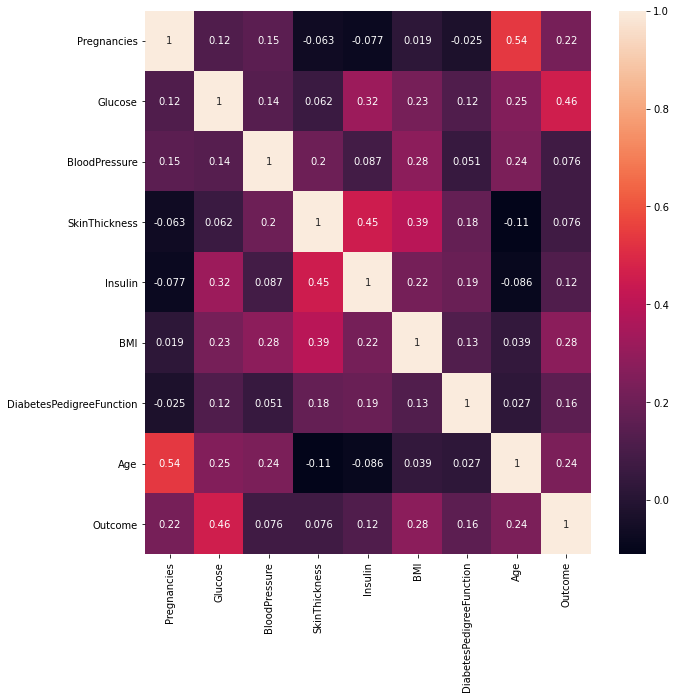

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)

# 4. Preparing the Data

In [5]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1]
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (1600, 8) (1600,)
Test Set:  (400, 8) (400,)


## 5. Training the Model

In [6]:
from sklearn.ensemble import RandomForestClassifier

'''
n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions. 
Higher number of trees give you better performance but makes your code slower.
'''

model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [7]:
print(model.predict(X_test))

[1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0
 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1]


## 6. Evaluating the model

In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, model.predict(X_test))*100)

98.25


## 7. Flattening

In [9]:
import pickle
pickle.dump(model, open("diabetes.pkl",'wb'))